### Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [3]:
train_df = pd.read_csv("../0-Data/train_0irEZ2H.csv")
train_df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


### EDA

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [5]:
train_df["week"] = pd.to_datetime(train_df["week"])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   record_ID        150150 non-null  int64         
 1   week             150150 non-null  datetime64[ns]
 2   store_id         150150 non-null  int64         
 3   sku_id           150150 non-null  int64         
 4   total_price      150149 non-null  float64       
 5   base_price       150150 non-null  float64       
 6   is_featured_sku  150150 non-null  int64         
 7   is_display_sku   150150 non-null  int64         
 8   units_sold       150150 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 10.3 MB


In [6]:
train_df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,2013-09-07,9984,223245,235.8375,235.8375,0,0,38
150146,212639,2013-09-07,9984,223153,235.8375,235.8375,0,0,30
150147,212642,2013-09-07,9984,245338,357.6750,483.7875,1,1,31
150148,212643,2013-09-07,9984,547934,141.7875,191.6625,0,1,12


In [7]:
features = ["total_price", "base_price", "is_featured_sku", "is_display_sku", "units_sold"]

for feature in features:
    unique_vals = train_df[feature].unique()
    print(f"Unique values for feature {feature}")
    print(unique_vals)
    print("\n")

Unique values for feature total_price
[ 99.0375 133.95   141.075  227.2875 327.0375 210.9    190.2375  97.6125
  98.325  133.2375 139.65   236.55   214.4625 266.475  173.85   205.9125
 248.6625 200.925  427.5    429.6375 177.4125  87.6375  88.35    85.5
 128.25   127.5375 123.975  235.8375 234.4125 235.125  312.7875 240.825
 213.0375 190.95   426.7875 170.2875 178.125   82.65    84.075  143.2125
 231.5625 232.9875 295.6875 216.6    205.2    183.1125 184.5375 134.6625
 140.3625 310.65   169.575  241.5375 192.375  431.775  428.2125 460.275
 355.5375 208.05   288.5625 131.8125 138.9375 303.525  200.2125 428.925
 123.2625 136.8    230.85   199.5     83.3625 126.1125 111.8625 237.975
 217.3125 264.3375 191.6625 132.525  125.4    207.3375 188.1    116.85
 115.425  219.45   116.1375 106.875  141.7875 221.5875 282.15   171.7125
 250.8    431.0625 131.1    436.05   124.6875 282.8625  86.925  126.825
 229.425  230.1375 224.4375 215.8875 483.7875 223.725  193.8    203.0625
 204.4875 142.5    206.

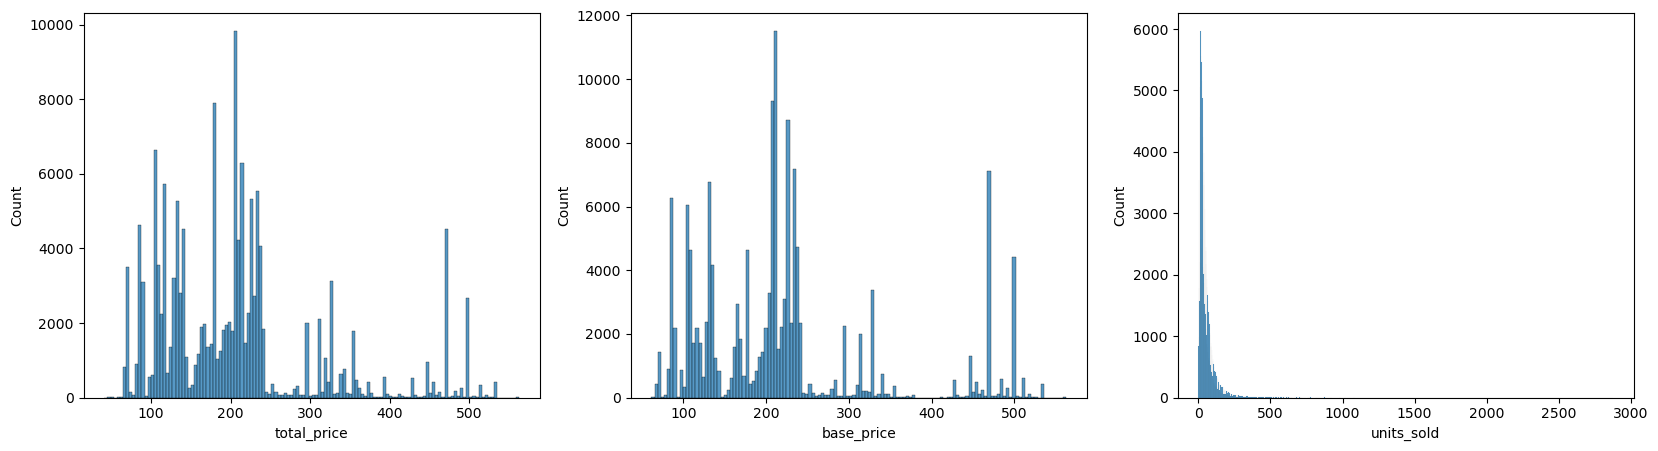

In [10]:
features = ["total_price", "base_price", "units_sold"]

fig, axes = plt.subplots(1, 3, figsize=(20,5))
axes = axes.flatten()

for i in range(3):
    sns.histplot(data=train_df, x=features[i], ax=axes[i])

plt.show()

In [14]:
features = ["total_price", "base_price", "is_featured_sku", "is_display_sku", "units_sold"]

for feature in features:
    temp_df = train_df[train_df[feature] < 0]
    unique_obs = temp_df.nunique()
    print(f"Feature {feature}")
    print(unique_obs)
    print("\n")

Feature total_price
record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64


Feature base_price
record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64


Feature is_featured_sku
record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64


Feature is_display_sku
record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64


Feature units_sold
record_ID          0
week               0
store_id           0
sku_id          

In [15]:
train_df["sku_id"].nunique()

28